----
# SVM classification using sklearn
With LDA for dimensionality reduction to 5 dimensions

----

In [66]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# Use noisy data sets
noise = True

# Load data sets
trn_data = pd.read_csv(f"../TrainingData/neodata/zahra_all_{'' if noise else 'no'}noise_1200.csv")
vld_data = pd.read_csv(f"../ValidationData/neodata/zahra_all_{'' if noise else 'no'}noise_1200.csv")
tst_data = pd.read_csv(f"../TestData/neodata/zahra_all_{'' if noise else 'no'}noise_100.csv")

# Separate into data and targets
y_trn = trn_data.pop('target')
X_trn = trn_data

y_vld = vld_data.pop('target')
X_vld = vld_data

y_tst = tst_data.pop('target')
X_tst = tst_data

targets = y_trn.unique().tolist()

In [68]:
vld_data.head()

,Pdis,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,Tamb,Tset
0,9.484680,-1.909377,37.435879,60.074930,18.097345,11.678362,13.587749,7.003053,100.000000,10,7
1,8.244619,3.492898,32.389458,41.783543,13.882080,9.951144,6.458251,7.010000,59.882871,20,7
2,8.463726,7.701740,33.320772,39.330323,20.124033,14.615787,6.914056,12.015465,70.230795,30,12
3,9.591645,-2.379813,37.847435,61.599914,18.312900,11.798095,14.177923,7.007005,100.000000,20,7
4,8.087035,-3.010085,31.708084,48.401807,5.809783,3.424566,6.434649,0.003911,52.312043,20,0


## Standardize data (z-norm)

In [69]:
standardizer = StandardScaler()
X_trn = standardizer.fit_transform(X_trn)
X_vld = standardizer.transform(X_vld)
X_tst = standardizer.transform(X_tst)

# LDA dimensionality reduction

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 8)

X_vld = lda.fit(X_trn,y_trn).transform(X_vld)
X_tst = lda.fit(X_trn,y_trn).transform(X_tst)
X_trn = lda.fit(X_trn,y_trn).transform(X_trn)

# SVM fitting

In [78]:
# Training the SVM, on the 5 dimensional data
from sklearn import svm

clf_svm = svm.SVC( C=5000, decision_function_shape="ovo",gamma=0.001 )
clf_svm.fit(X_trn,y_trn)

SVC(C=5000, decision_function_shape='ovo', gamma=0.001)

# Classifying training data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'LDA5-SVM on training set : Accuracy 90.687%'}, xlabel='Predicted class', ylabel='True class'>)

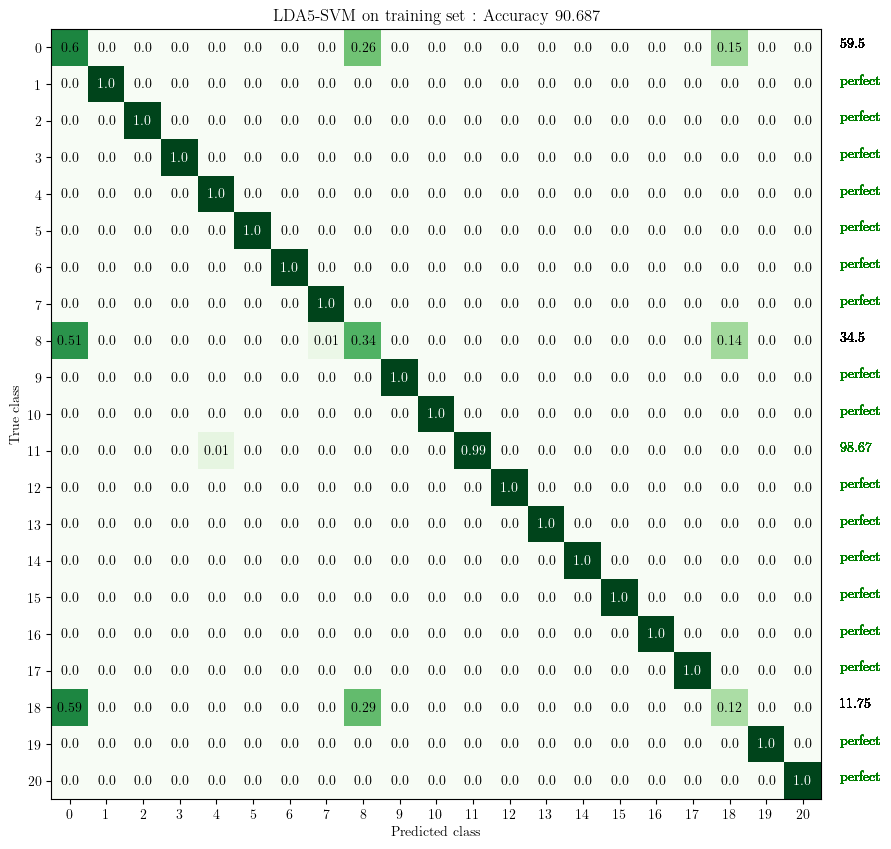

In [79]:
# Make predictions for the training set
y_hat_trn = clf_svm.predict(X_trn)

#plot the confusion matrix
conf_matrix = skconfmatrix(y_trn,y_hat_trn)
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA5-SVM on training set')

# Classifying validation data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'LDA5-SVM on validation set : Accuracy 90.611%'}, xlabel='Predicted class', ylabel='True class'>)

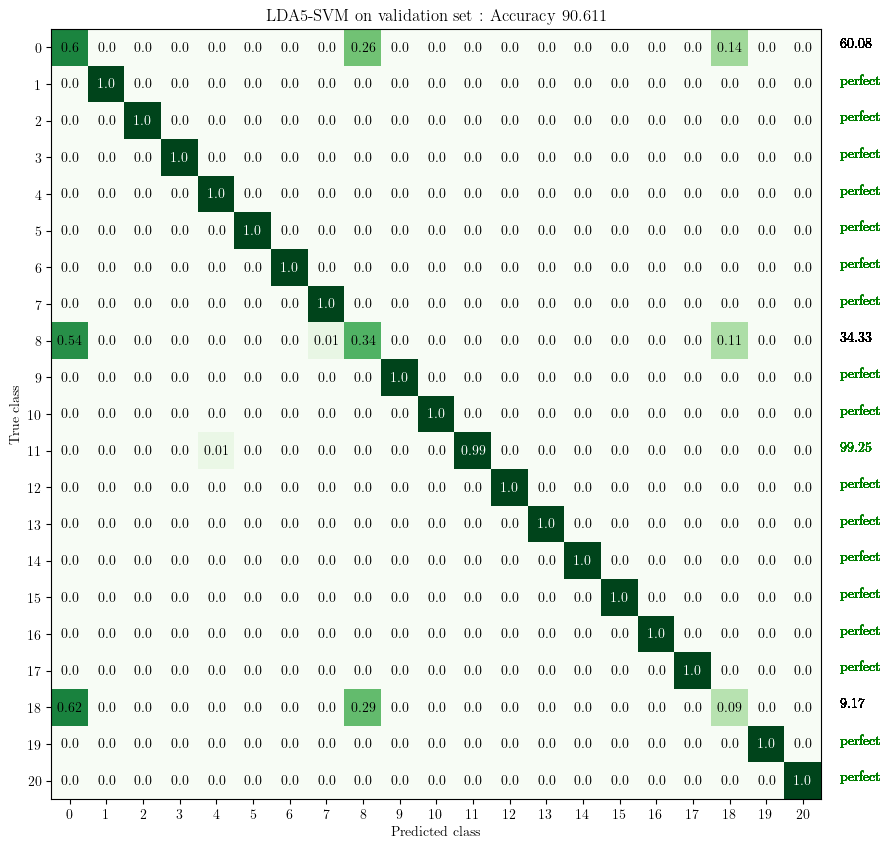

In [80]:
# Make predictions for the training set
y_hat_vld = clf_svm.predict(X_vld)

#plot the confusion matrix
conf_matrix = skconfmatrix(y_vld,y_hat_vld)
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA5-SVM on validation set')

# Classifying test data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'LDA5-SVM on test set : Accuracy 85.714%'}, xlabel='Predicted class', ylabel='True class'>)

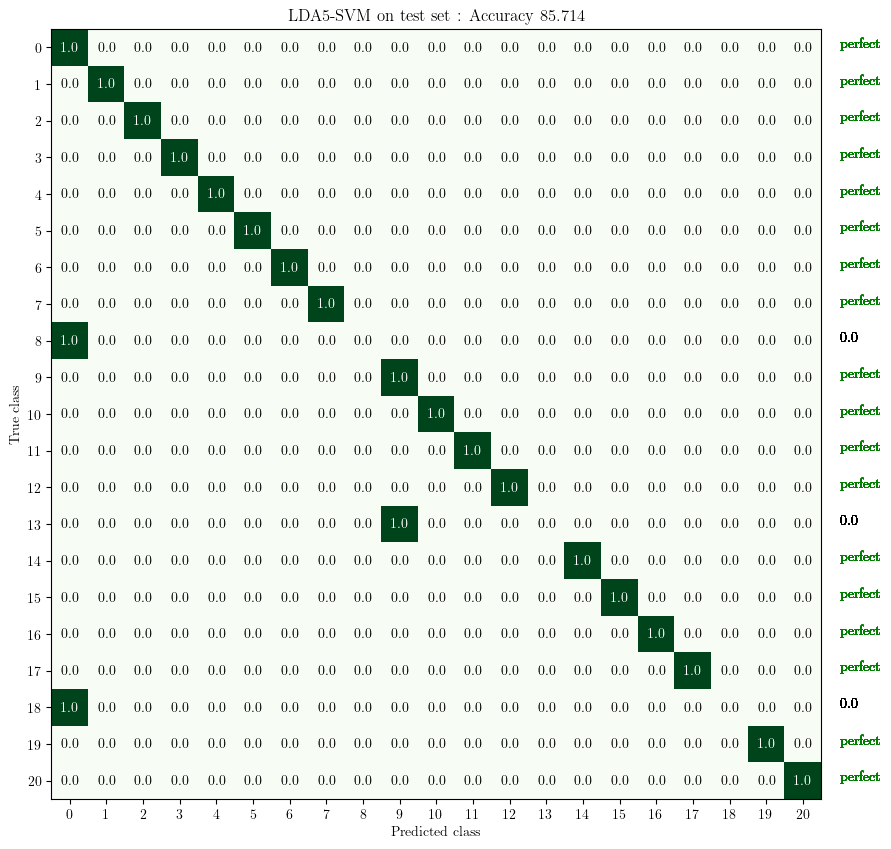

In [81]:
# Make predictions for the training set
y_hat_tst = clf_svm.predict(X_tst)

#plot the confusion matrix
conf_matrix = skconfmatrix(y_tst,y_hat_tst)
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA5-SVM on test set')